In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import seaborn.objects as so

In [9]:
# # Charger les données du fichier CSV
data = pd.read_csv("data/cars_cleaned.csv")

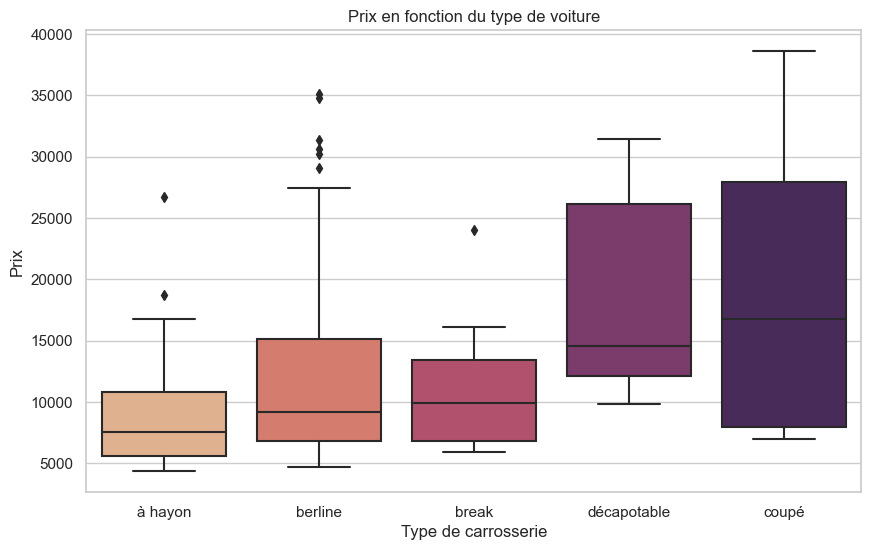

In [10]:
# Filtrer les colonnes pertinentes
data_filtered = data[['type_carrosserie', 'prix']]

# Trier les types de carrosserie par la médiane des prix en ordre croissant
median_sorted = data_filtered.groupby('type_carrosserie').median().sort_values('prix', ascending=True)
sorted_types = median_sorted.index.tolist()

# Tracer un graphique montrant le prix en fonction du type de voiture
plt.figure(figsize=(10, 6))

# Utiliser le colormap "plasma"
num_types = len(sorted_types)
cmap = plt.get_cmap('flare', num_types)
colors = [cmap(i) for i in range(num_types)]

sns.boxplot(x='type_carrosserie', y='prix', data=data_filtered, palette=colors, order=sorted_types)
plt.title("Prix en fonction du type de voiture")
plt.xlabel("Type de carrosserie")
plt.ylabel("Prix")

# Afficher le graphique
plt.show()

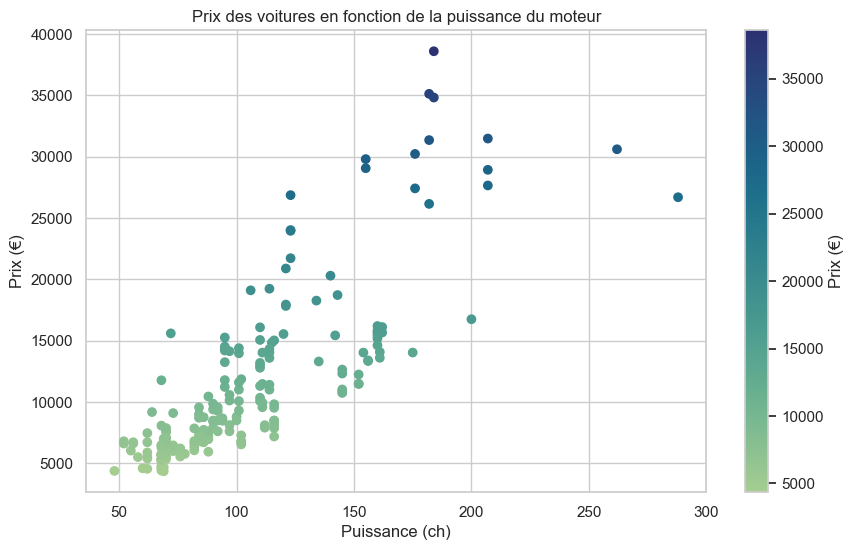

In [11]:
# Créer le scatterplot
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('crest')  # Utiliser le colormap "crest"
points = plt.scatter(data=data, x='puissance', y='prix', c='prix', cmap=cmap)

# Personnaliser le graphique
plt.title("Prix des voitures en fonction de la puissance du moteur")
plt.xlabel("Puissance (ch)")
plt.ylabel("Prix (€)")
plt.colorbar(points, label="Prix (€)")  # Ajouter une légende de couleur pour le colormap

# Afficher le graphique
plt.show()


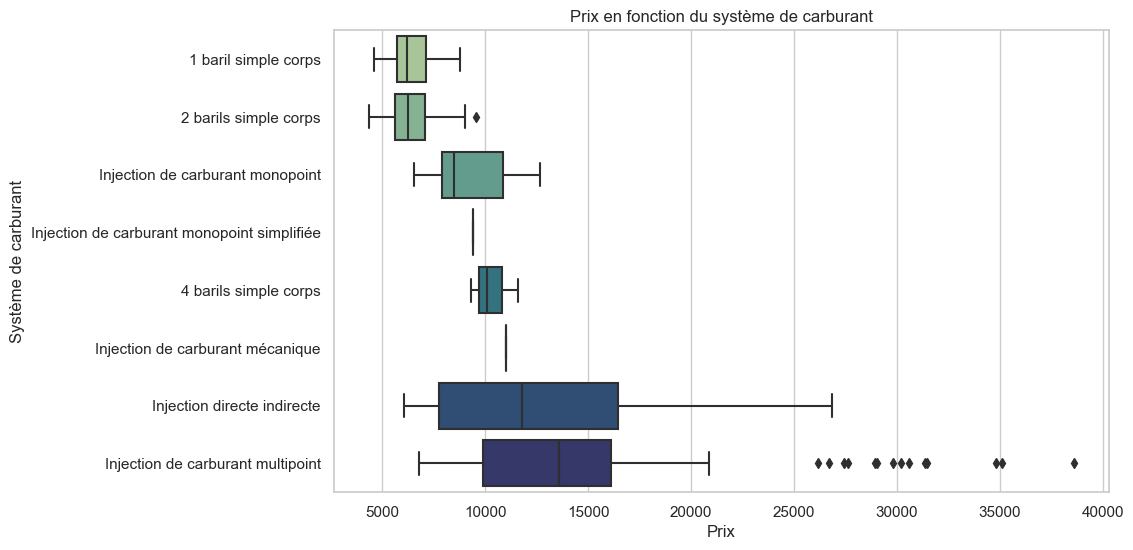

In [12]:
# Filtrer les colonnes pertinentes
data_filtered = data[['systeme_carburant', 'prix']].copy()

# Calculer la médiane des prix pour chaque système de carburant
medians = data_filtered.groupby('systeme_carburant')['prix'].median().sort_values()

# Trier les données en fonction des médianes calculées
data_filtered['systeme_carburant'] = pd.Categorical(data_filtered['systeme_carburant'], categories=medians.index, ordered=True)

# Configurer le thème Seaborn
sns.set_theme(style='whitegrid')

# Utiliser le colormap "crest"
cmap = plt.get_cmap('crest')
colors = cmap(np.linspace(0, 1, len(medians)))

# Tracer un graphique montrant le prix en fonction du système de carburant
plt.figure(figsize=(10, 6))
sns.boxplot(y='systeme_carburant', x='prix', data=data_filtered, palette=colors)
plt.title("Prix en fonction du système de carburant")
plt.ylabel("Système de carburant")
plt.xlabel("Prix")

# Afficher le graphique
plt.show()
